<a href="https://colab.research.google.com/github/Nafise-Dev/DA_taux_suicides/blob/main/Taux_suicides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv(r'/content/drive/MyDrive/Taux suicides_DA/master.csv')
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [63]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [105]:
#renommer les colonnes
df.rename(columns={"suicides/100k pop":"suicides_pop","gdp_for_year ($)":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita", "HDI for year":"hdi_for_year"}, inplace=True)
#enlève les virgules pour les nombres
df["gdp_for_year"] = df["gdp_for_year"].astype(str).str.replace(",","")
df

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


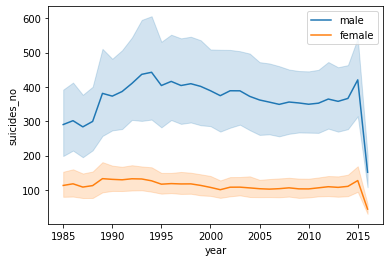

In [114]:
df_men = df[df["sex"] == "male"]
df_women = df[df["sex"] == "female"]
sb.lineplot(x=df_men.year, y=df.suicides_no)
sb.lineplot(x=df_women.year, y=df.suicides_no)
plt.legend(["male", 'female'])
plt.show()

Je compare le taux de suicides avec le sexe masculin et féminin.

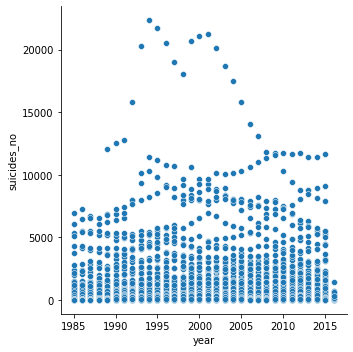

In [70]:
df_men = df[df["sex"] == "male"]
sb.relplot(x=df_men.year, y="suicides_no", data=df)

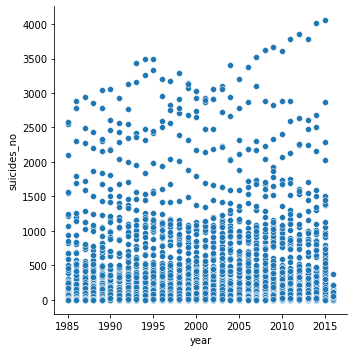

In [71]:
df_women = df[df["sex"] == "female"]
sb.relplot(x=df_women.year, y="suicides_no", data=df)

Je constate que le taux de suicides pour les personnes de sexe masuclin est élevé par rapport aux personnes de sexe opposés.

Je vais donc comparer l'âge avec le sexe masculin et féminin.

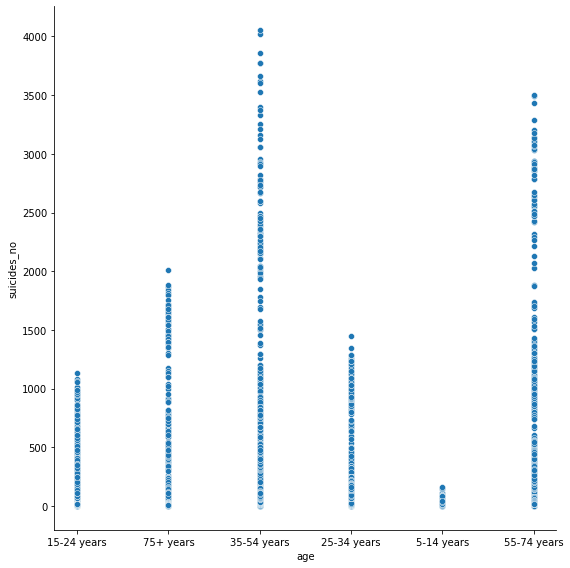

In [102]:
df_women = df[df["sex"] == "female"]
sb.relplot(x=df_women.age, y="suicides_no", data=df, height=8)


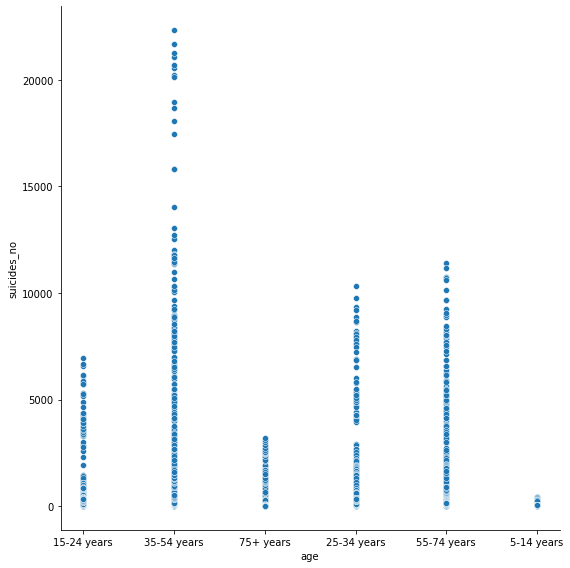

In [74]:
df_women = df[df["sex"] == "male"]
sb.catplot(x=df_women.age, y="suicides_no", data=df, height=8)

L'âge est donc un des facteurs qui a une influence sur le taux de suicides. (En générale les personnes âgées pour des raisons de dépression, l'absence de campagnie).

La condition de vie dans chaque pays pourrait également influencer le taux de suicides.


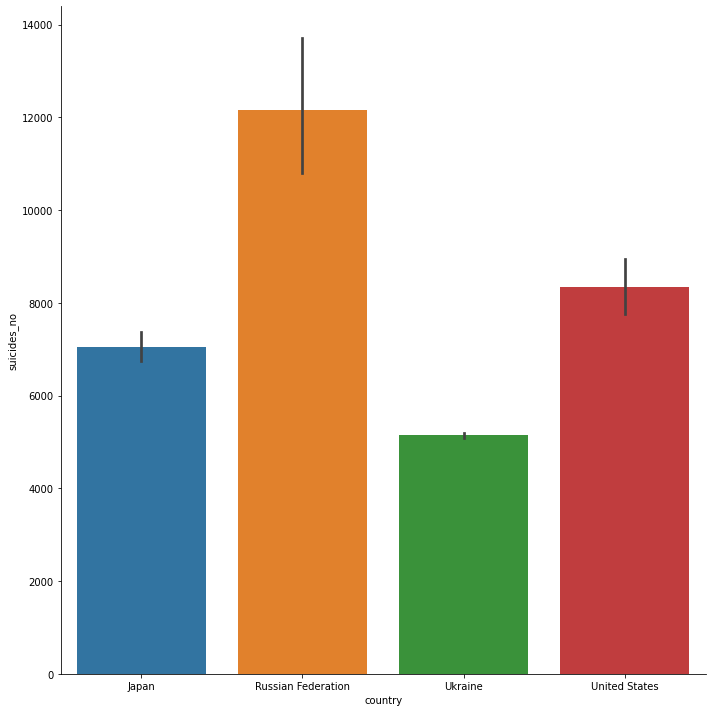

In [137]:
df_age = df[(df["age"]>="35-54 years") & (df["suicides_no"]>=5000)]
# df_age
sb.catplot(x="country", y="suicides_no", data = df_age, kind="bar",height=10)


Les pays où le taux de suicides est élevé sont donc la Russie, les États-Unis, l'Ukraine et le Japon.

Il faut  mesurer le lien entre l'IDH (indice de développement humain) et le PIB pour ces 4 pays.

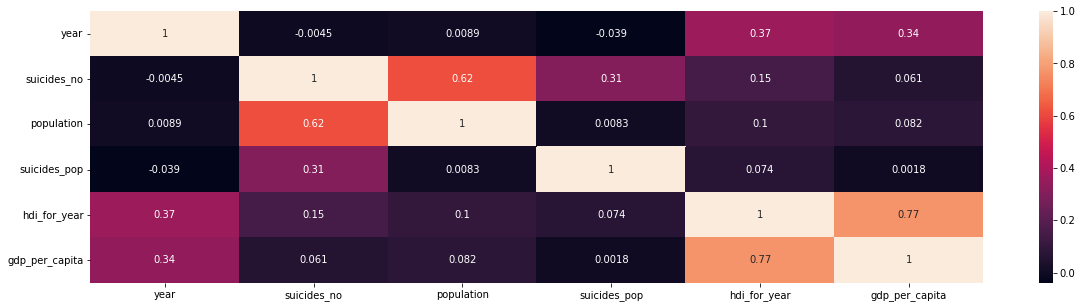

In [118]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmapEX1.png')

La corrélation est de 0.77 entre les caractéristiques "hdi_for_year" et "gdp_per_capita". Ceci me permet de déduire que se sont des facteurs qui influencent le taux de suicides dans ces 4 pays.

In [138]:
df.hdi_for_year.describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: hdi_for_year, dtype: float64

In [140]:
df.gdp_per_capita.describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita, dtype: float64

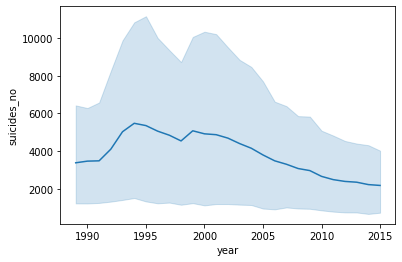

In [157]:
df_age = df[(df["age"]>="35-54 years") & (df["country"]=="Russian Federation")]
sb.lineplot(x="year",y="suicides_no", data=df_age)

In [ ]:
df_age = df[(df["age"]>="35-54 years") & (df["country"]=="Russian Federation")]
sb.lineplot(x="year",y="suicides_no", data=df_age)